In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('data3.csv')

In [ ]:
df.describe()

In [ ]:
df

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 15))
# sns.scatterplot(x='x1', y='x2', hue='y', data=df)
# plt.savefig('lab5scatter.png')

In [ ]:
sns.scatterplot(x='x1', y='x2', hue='y', data=df)

In [5]:
# def relu(z):
#     return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# def sigmoid_derivative(z):
#     return sigmoid(z) * (1 - sigmoid(z))

def sigmoid_derivative(z):
    return z * (1 - z)

def loss(y_true, y_pred):
    s = np.multiply(y_true, np.log(y_pred)) + np.multiply((1 - y_true), 1 - np.log(y_pred))
    return - 1 / y_true.shape[0] * (np.sum(s))

In [37]:
class DNN:
    
    def __init__(self, layers=(2, 9, 1), lr=0.1, max_iter=100000, tol=0.001):
        
        self.layers = layers
        self.lr = lr
        self.max_iter = max_iter
        self.tol  = tol
        self.loss_history = []
        self.x = None
        self.y = None
        self.arr = None
        self.multiplier = None
    
    def init_weights(self, input_size):
        np.random.seed(42)
#         self.layers.insert(0, input_size)
#         self.w = [np.random.normal(0, 0.2, (self.layers[i], self.layers[i + 1])) for i in range(len(self.layers) - 1)]
        self.b = [np.zeros((self.layers[i], )) for i in range(1, len(self.layers))]
        self.w = [2*np.random.random((self.layers[i], self.layers[i + 1])) - 1 for i in range(len(self.layers) - 1)]
#         self.b = [np.random.randn(self.layers[i], ) for i in range(1, len(self.layers))]
    
    def forward_propagation(self, xx=None, predict=False):
        x = xx if xx is not None else self.x
        self.arr = [np.copy(x)]
        Z = self.arr[0]
        for i in range(len(self.layers) - 2):
            Z = np.dot(Z, self.w[i])
            self.arr.append(Z)
            Z = sigmoid(Z)
            self.arr.append(Z)
#         L1 = np.dot(x, self.w[0])
#         A1 = sigmoid(L1)
#         L2 = np.dot(A1, self.w[1])
#         A2 = sigmoid(L2)
#         L3 = np.dot(A2, self.w[2])
#         A3 = sigmoid(L3)
#         self.arr.append(L1)
#         self.arr.append(A1)
#         self.arr.append(L2)
#         self.arr.append(A2)
#         self.arr.append(L3)
#         self.arr.append(A2)
        Z = np.dot(Z, self.w[-1])
        self.arr.append(Z)
        Z = sigmoid(Z)
        if not predict:
#             self.arr.append(A3)
            self.arr.append(Z)
            self.loss_history.append(loss(self.y, Z))
        return Z
    
    def back_propagation(self, y_pred):
        delta = self.y - y_pred
        w_upd = []
        w_ = self.w + [np.array(1)]
        for i in range(len(self.layers) - 1, 0, -1):
            delta = delta.dot(w_[i].T) * sigmoid_derivative(self.arr[2 * i])
            dw = self.arr[2 * (i - 1)].T.dot(delta)
            db = np.sum(delta, axis=0)
            w_upd.append(dw)
            w_upd.append(db)
        for i in range(len(self.w) - 1, -1, -1):
            self.w[-i - 1] += self.multiplier * w_upd[2 * i]
#             self.b[-i - 1] += self.multiplier * w_upd[2 * i + 1]
        self.arr = None
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.multiplier = self.lr / X.shape[0]
        self.init_weights(x.shape[1])
        for i in range(self.max_iter):
#             print(f'epoch {i}')
            y_pred = self.forward_propagation()
            self.back_propagation(y_pred)
    
    def predict(self, x):
#         return self.forward_propagation(x, predict=True)
        return np.round(self.forward_propagation(x, predict=True))

    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss_history)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [7]:
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(X)

In [8]:
data = df.values
np.random.shuffle(data)

In [9]:
X = data[:, :2]
y = data[:, 2].reshape(-1, 1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# X.min()

In [25]:
nn.loss_history

[-0.43937186487826413,
 -0.4393711833676936,
 -0.4393705018642999,
 -0.43936982036808303,
 -0.43936913887904316,
 -0.43936845739718017,
 -0.4393677759224941,
 -0.4393670944549852,
 -0.43936641299465334,
 -0.43936573154149844,
 -0.4393650500955208,
 -0.43936436865672024,
 -0.43936368722509694,
 -0.4393630058006509,
 -0.43936232438338213,
 -0.43936164297329067,
 -0.4393609615703765,
 -0.4393602801746398,
 -0.43935959878608055,
 -0.4393589174046988,
 -0.43935823603049434,
 -0.43935755466346754,
 -0.4393568733036184,
 -0.43935619195094683,
 -0.43935551060545286,
 -0.4393548292671367,
 -0.4393541479359982,
 -0.4393534666120375,
 -0.4393527852952546,
 -0.4393521039856495,
 -0.4393514226832223,
 -0.43935074138797303,
 -0.43935006009990163,
 -0.4393493788190083,
 -0.43934869754529304,
 -0.43934801627875575,
 -0.43934733501939666,
 -0.4393466537672157,
 -0.43934597252221286,
 -0.4393452912843882,
 -0.43934461005374187,
 -0.4393439288302739,
 -0.4393432476139841,
 -0.43934256640487274,
 -0.43934

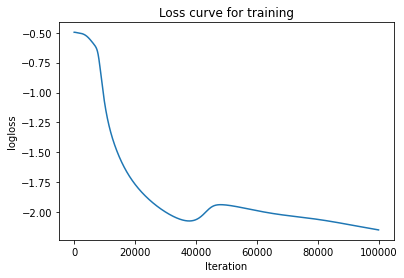

In [36]:
import matplotlib.pyplot as plt
nn.plot_loss()

In [40]:
nn = DNN(layers=(2, 4, 1))
nn.fit(X, y)

In [21]:
y_pred = nn.predict(X)
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y, nn.predict(X))

0.95

In [ ]:
# def train(x, y, layers=[3, 3, 1], lr=0.01, max_iter=10, tol=0.001):
# #     z = np.copy(x)
#     layers.insert(0, z.shape[1])
#     w = [np.random.normal(0, 0.2, (layers[i], layers[i + 1])) for i in range(len(layers) - 1)]
# #     w = [np.random.normal(0, 0.2, (matrix.shape[1], neurons)] + w
#     b = [np.zeros((layers[i], )) for i in range(1, len(layers))]
# #     arr = [z]
# #     w_upd = []
#     mult = lr / z.shape[0]
#     loss_history = []
#     for i in range(max_iter):
#         print(f'epoch {i}')
#         arr = [np.copy(x)]
#         w_upd = []
#         for j in range(len(layers) - 2):
#             z = np.dot(w[i], arr[0]) + self.b[i]
#             arr.append(z)
#             z = sigmoid(z)
#             arr.append(z)
#         z = np.dot(w[-1], z) + b[-1]
#         arr.append(z)
#         z = sigmoid(z)
#         arr.append(z)
#         loss_history.append(loss(y, z))
#         delta = z - y
#         arr.append(delta)
# #         print(delta.shape, z.shape)
#         dw = np.dot(delta, z.T)
#         w_upd.append(dw)
#         db = np.sum(delta, axis=1, keepdims=True)
#         w_upd.append(db)
#         for j in range(len(layers) - 2, 0, -1):
#             delta = np.dot(np.dot(delta, w[j]), sigmoid_derivative(2 * j - 1))
#             dw = np.dot(delta, arr[2 * j].T)
#             w_upd.append(dw)
#             db = np.sum(delta, axis=1, keepdims=True)
#             w_upd.append(db)
#         for j in range(len(w)):
#             w[j] += - mult * w_upd[2 * j]
#             b[j] += - mult * w_upd[2 * j + 1]
#         if loss[-1] - loss[-2] < tol:
#             print(f'Algorithm converged at epoch {i}')
#             break
    
        

In [ ]:
net = NeuralNet(layers=[2, 8, 1])
net.fit(X, y.reshape(-1, 1))

In [ ]:
y_pred = net.predict(X)
y_pred

In [ ]:
import matplotlib.pyplot as plt
net.plot_loss()

In [ ]:

class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.01, iterations=100):
        self.params = {}
        self.layers = layers
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        for i in range(1, len(self.layers)):
            self.params[f'W{i}'] = np.random.randn(self.layers[i - 1], self.layers[i])
            self.params[f'b{i}'] = np.random.randn(self.layers[i], )
        
    def relu(self,Z):
        '''
        The ReLufunction performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0, Z)
        
        
    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1.0 / (1.0 + np.exp(-Z))
    
    def entropy_loss(self,y, yhat):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
        return loss

    
    def forward_propagation(self, x=None, predict=False):
        '''
        Performs the forward propagation
        '''
        Z = self.X if x is None else x
        for i in range(1, len(self.layers) - 1):
            Z = Z.dot(self.params[f'W{i}']) + self.params[f'b{i}']
            self.params[f'Z{i}'] = Z
            Z = self.relu(Z)
            self.params[f'A{i}'] = Z
        k = len(self.layers) - 1
        Z = Z.dot(self.params[f'W{k}']) + self.params[f'b{k}']
        yhat = self.sigmoid(Z)
        if predict:
            return yhat
        self.params[f'Z{k}'] = Z
#         Z1 = self.X.dot(self.params['W1']) + self.params['b1']
#         A1 = self.relu(Z1)
#         Z2 = A1.dot(self.params['W2']) + self.params['b2']
#         yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y, yhat)

        # save calculated parameters     
#         self.params['Z1'] = Z1
#         self.params['Z2'] = Z2
#         self.params['A1'] = A1

        return yhat,loss

    
    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        def dRelu(x):
            z = np.copy(x)
#             print('dr', x)
            z[z<=0] = 0
            z[z>0] = 1
            return z
         
        dl_wrt_yhat = -(np.divide(self.y, yhat) - np.divide((1 - self.y), (1 - yhat)))
        dl_wrt_sig = yhat * (1 - yhat)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig
        dz = dl_wrt_z2
        w_upd = []
        for i in range(len(self.layers) - 2, 0, -1):
            dw = self.params[f'A{i}'].T.dot(dz)
            db = np.sum(dz, axis=0)
            w_upd.append(dw)
            w_upd.append(db)
            dz = dz.dot(self.params[f'W{i + 1}'].T) * dRelu(self.params[f'Z{i}'])
#         self.params[f'W2'] = self.params[f'W2'] - self.learning_rate * dw
#         self.params[f'b2'] = self.params[f'b2'] - self.learning_rate * db
        dw = self.X.T.dot(dz)
        db = np.sum(dz, axis=0)
        w_upd.append(dw)
        w_upd.append(db)
        for i in range(1, len(self.layers)):
            self.params[f'W{i}'] += - self.learning_rate * w_upd[- (2 * i)]
            self.params[f'b{i}'] += - self.learning_rate * w_upd[- (2 * i) + 1]
        
#         self.params['W1'] = self.params['W1'] - self.learning_rate * dw
#         self.params['b1'] = self.params['b1'] - self.learning_rate * db
#         dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
#         dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
#         dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

# #         dl_wrt_z1 = dl_wrt_A1 * dRelu(self.params['Z1'])
#         dl_wrt_z1 = dl_wrt_z2.dot(self.params['W2'].T) * dRelu(self.params['Z1'])
#         dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
#         dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)

# #         update the weights and bias
#         self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
#         self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
#         self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
#         self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

        
    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
            
            
    def predict(self, X):
        return np.round(self.forward_propagation(X, predict=True))
#         '''
#         Predicts on a test data
#         '''
#         Z1 = X.dot(self.params['W1']) + self.params['b1']
#         A1 = self.relu(Z1)
#         Z2 = A1.dot(self.params['W2']) + self.params['b2']
#         pred = self.sigmoid(Z2)
#         return np.round(pred)              

                                
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [ ]:

class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.layers = layers
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
    def relu(self,Z):
        '''
        The ReLufunction performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0, Z)
        
        
    def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1.0 / (1.0 + np.exp(-Z))
    
    def entropy_loss(self,y, yhat):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
        return loss

    
    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    
    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        def dRelu(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        
        dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
        dl_wrt_sig = yhat * (1-yhat)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

        dl_wrt_z1 = dl_wrt_A1 * dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

        
    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
            
            
    def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)              

                                
    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [ ]:
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
X = heart_df.drop(columns=['heart_disease'])
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)
y_label = heart_df['heart_disease'].values.reshape(X.shape[0], 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

In [ ]:
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)
print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

In [ ]:
nn = NeuralNet(layers=[13, 10, 1]) # create the NN model
nn.fit(Xtrain, ytrain) #train the model

In [ ]:
nn = NeuralNet(layers=[13,10,1], learning_rate=0.01, iterations=500) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

In [ ]:

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

In [ ]:
import numpy as np

# X = (hours studying, hours sleeping), y = score on test
xAll = np.array(([2, 9], [1, 5], [3, 6], [5, 10]), dtype=float) # input data
y = np.array(([92], [86], [89]), dtype=float) # output

# scale units
xAll = xAll/np.amax(xAll, axis=0) # scaling input data
y = y/100 # scaling output data (max test score is 100)

# split data
X = np.split(xAll, [3])[0] # training data
xPredicted = np.split(xAll, [3])[1] # testing data

class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 20

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self):
    print("Predicted data based on trained weights: ")
    print("Input (scaled): \n" + str(xPredicted))
    print("Output: \n" + str(self.forward(xPredicted)))

NN = Neural_Network()
for i in range(1000): # trains the NN 1,000 times
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
  print("\n")
  NN.train(X, y)

NN.saveWeights()
NN.predict()